In [9]:
import pandas as pd

file_path = '/content/insurance.csv'

df = pd.read_csv(file_path)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Preprocessing

In [18]:
df['sex'] = [0 if elem == 'female' else 1 for elem in df['sex']]

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [19]:
df['smoker'] = [0 if elem == 'no' else 1 for elem in df['smoker']]

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(df['region'].drop_duplicates())

df['region'] = label_encoder.transform(df['region'])

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [22]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


### EDA

In [36]:
df['sex'].value_counts()

sex
1    676
0    662
Name: count, dtype: int64

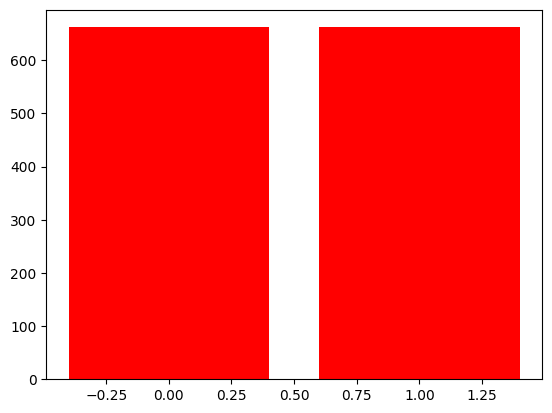

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.bar(x=df['sex'], height=len(df[df['sex'] == 0]), color='r')

plt.show()

<Axes: xlabel='sex', ylabel='count'>

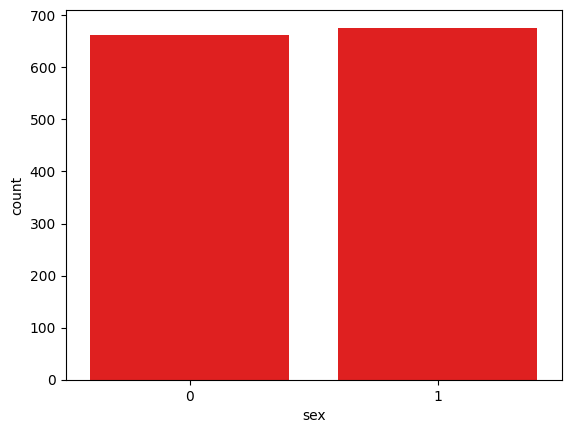

In [42]:
sns.countplot(data=df, x='sex', color='r')

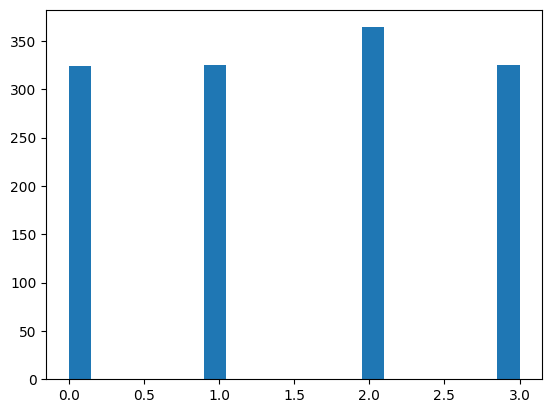

In [47]:
plt.hist(x=df['region'], bins=20)

plt.show()

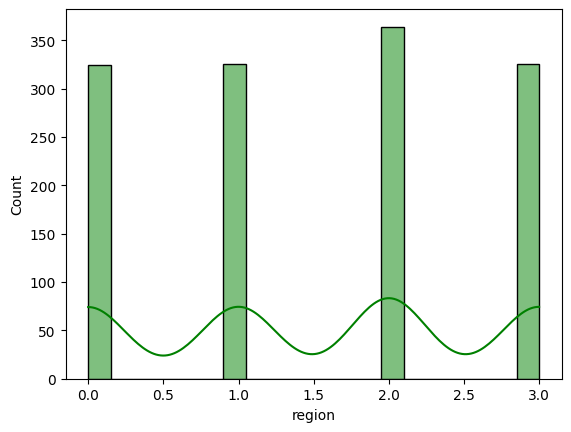

In [48]:
sns.histplot(data=df['region'], bins=20, kde=True, color='g')

plt.show()

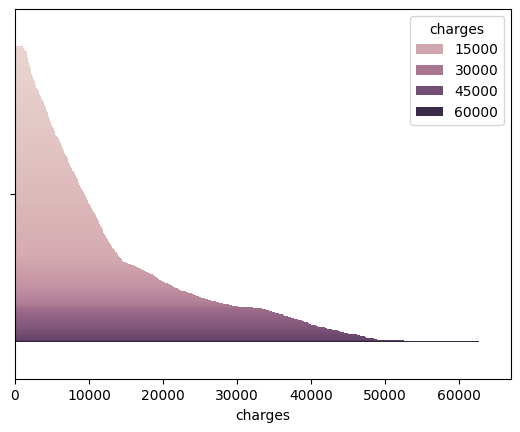

In [51]:
sns.barplot(data=df, x=df['charges'], hue='charges')

plt.show()

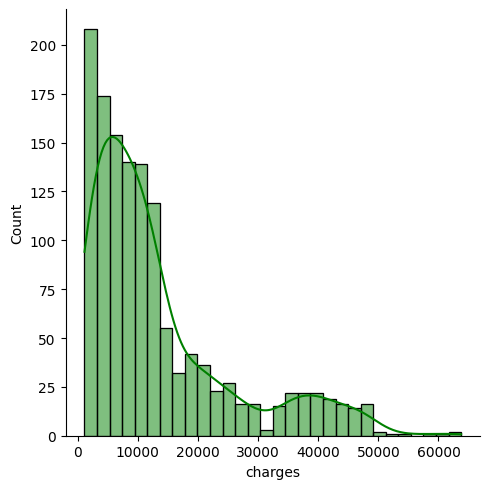

In [46]:
sns.displot(data=df, x='charges', kde=True, color='g')
plt.show()

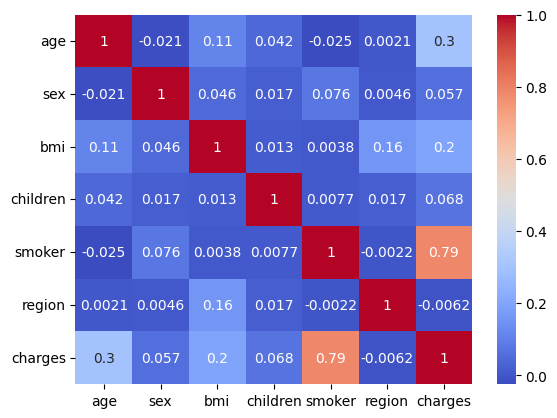

In [31]:
corr = df.corr()
sns.heatmap(data=corr, annot=True, cmap='coolwarm')

plt.show()

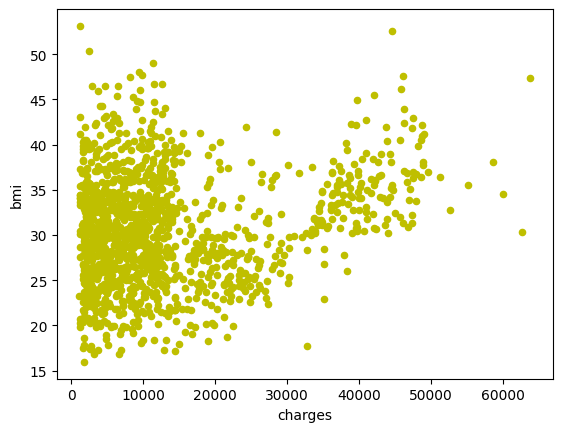

In [84]:
df.plot(kind='scatter', x='charges', y='bmi', color='y')

plt.show()

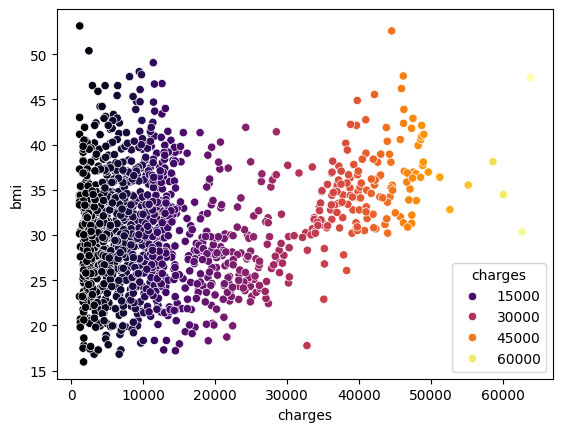

In [61]:
sns.scatterplot(data=df, x='charges', y='bmi', hue='charges', palette='inferno')
plt.show()

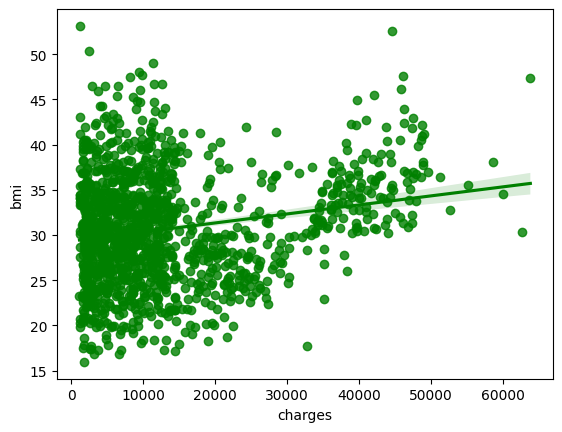

In [66]:
sns.regplot(data=df, x='charges', y='bmi', color='green')
plt.show()

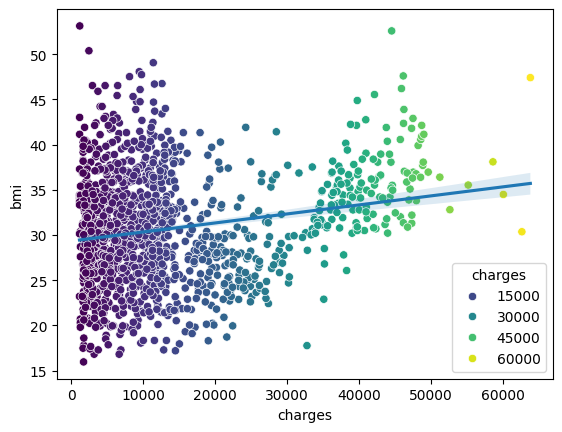

In [70]:

sns.scatterplot(data=df, x='charges', y='bmi', hue='charges', palette='viridis')
sns.regplot(data=df, x='charges', y='bmi', scatter=False)

plt.show()

In [73]:
min(df['charges']), max(df['charges'])

(1121.8739, 63770.42801)

In [71]:
df['charges'].value_counts()

charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

In [78]:
import numpy as np

df['charges_category'] = pd.cut(df['charges'],
                                bins=[0,10_000, 20_000, 30_000, 40_000, 50_000, 60_000, np.inf],
                                labels=[1,2,3,4,5,6,7])

df[:5]

,age,sex,bmi,children,smoker,region,charges,charges_category
0,19,0,27.900,0,1,3,16884.92400,2
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,1
3,33,1,22.705,0,0,1,21984.47061,3
4,32,1,28.880,0,0,1,3866.85520,1


In [79]:
df['charges_category'].value_counts()

charges_category
1    712
2    353
3    111
4     83
5     72
6      4
7      3
Name: count, dtype: int64

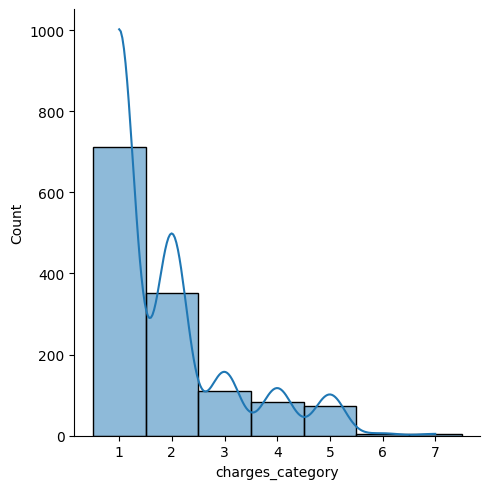

In [81]:
sns.displot(data=df, x=df['charges_category'], kde=True)

plt.show()

In [86]:
saved_colum = df['charges_category']

df = df.drop('charges_category', axis=1)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Train/Test split

In [88]:
y = df['charges']
df_copy = df
X = df_copy.drop('charges', axis=1)

X.shape, y.shape

((1338, 6), (1338,))

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

### Model building

LinearRegression

In [90]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [92]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

mse

33635210.431178406

In [93]:
from sklearn.metrics import r2_score

y_pred = lin_reg.predict(X_test)

r2Score = r2_score(y_test, y_pred)

r2Score

0.7833463107364539

#### Decision Tree Regressor

In [94]:
from sklearn.tree import DecisionTreeRegressor

dec_tree_reg = DecisionTreeRegressor()

dec_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [95]:
from sklearn.metrics import mean_squared_error

y_pred = dec_tree_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

mse

38396236.37146043

In [97]:
from sklearn.metrics import r2_score

y_pred = dec_tree_reg.predict(X_test)

r2Score = r2_score(y_test, y_pred)

r2Score

0.7526792264096855

#### Random Forest Regressor

In [98]:
from sklearn.ensemble import RandomForestRegressor

rand_forest_reg = RandomForestRegressor()

rand_forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [99]:
from sklearn.metrics import mean_squared_error

y_pred = rand_forest_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

mse

21467117.287592277

In [101]:
from sklearn.metrics import r2_score

y_pred = rand_forest_reg.predict(X_test)

r2Score = r2_score(y_test, y_pred)

r2Score

0.8617243626964527

K Nearest Neighbors Regressor

In [102]:
from sklearn.neighbors import KNeighborsRegressor

kn_reg = KNeighborsRegressor()

kn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [103]:
from sklearn.metrics import mean_squared_error

y_pred = kn_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

mse

132529753.75201473

In [105]:
from sklearn.metrics import r2_score

y_pred = kn_reg.predict(X_test)

r2Score = r2_score(y_test, y_pred)

r2Score

0.1463392165684949

#### Gradient Boosting Regressor

In [106]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost_reg = GradientBoostingRegressor()

grad_boost_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [107]:
from sklearn.metrics import mean_squared_error

y_pred = grad_boost_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

mse

18944595.15596614

In [108]:
from sklearn.metrics import r2_score

y_pred = grad_boost_reg.predict(X_test)

r2Score = r2_score(y_test, y_pred)

r2Score

0.8779726251291786

In [111]:
indices = np.arange(len(y_test))

results_df = pd.DataFrame({
    'Index': indices,
    'Actual Value': y_test,
    'Predicted Value': y_pred
})

results_df[:3]

,Index,Actual Value,Predicted Value
764,0,9095.06825,11001.128629
887,1,5272.17580,5840.174656
890,2,29330.98315,28001.980112
